In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

## Question and problem definition

The dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

## Exploratory analysis

In [62]:
train_df = pd.read_csv('C:/Users/angel/Desktop/train.csv')

In [63]:
test_df = pd.read_csv('C:/Users/angel/Desktop/test.csv')

In [64]:
combine = [train_df, test_df]

#### Which features are avaible in the dataset?

In [65]:
print(train_df.columns.values)

['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'X' 'Y']


More specifically it includes the following variables:

- Dates - timestamp of the crime incident

- Category - category of the crime incident. (This is our target variable.)

- Descript - detailed description of the crime incident

- DayOfWeek - the day of the week

- PdDistrict - the name of the Police Department District

- Resolution - The resolution of the crime incident

- Address - the approximate street address of the crime incident

- X - Longitude

- Y - Latitude


#### Which features are categorical? Which features are numerical?

In [66]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [67]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


#### What are the data types for various features?


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


The dataset contains a lot of 'object' variables (aka strings) that we will need to encode.

#### What is the distribution of the features?

In [70]:
train_df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [71]:
train_df.describe(include=['O'])

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


#### Which features contain null or empty values?

In [72]:
train_df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [73]:
test_df.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

#### Single Variable Analysis

Are there any districts that are more dangerous than others?

In [74]:
print(train_df.PdDistrict.value_counts())

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64


[Text(0, 0, 'SOUTHERN'),
 Text(0, 0, 'MISSION'),
 Text(0, 0, 'NORTHERN'),
 Text(0, 0, 'BAYVIEW'),
 Text(0, 0, 'CENTRAL'),
 Text(0, 0, 'TENDERLOIN'),
 Text(0, 0, 'INGLESIDE'),
 Text(0, 0, 'TARAVAL'),
 Text(0, 0, 'PARK'),
 Text(0, 0, 'RICHMOND')]

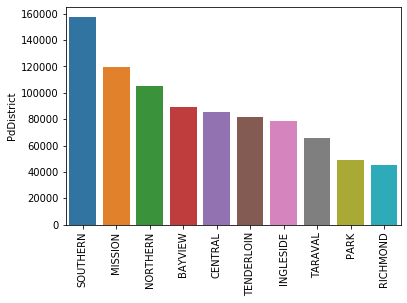

In [77]:
most_dangerous_districts = train_df.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

Clearly, there are differences in the occurrence of crimes through district.

Now let's take a look at the categories of crimes..

In [17]:
print(train_df.Category.value_counts())

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

There are 39 discrete categories that the police department file the incidents, with the most common being Larceny/Theft.

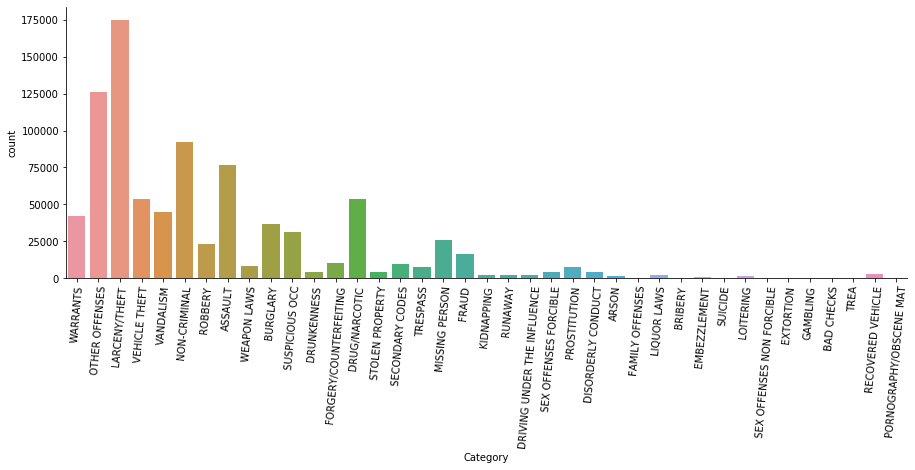

In [83]:
x = sns.catplot('Category', data = train_df, kind = 'count', aspect = 3, height = 4.5)
x.set_xticklabels(rotation = 85)

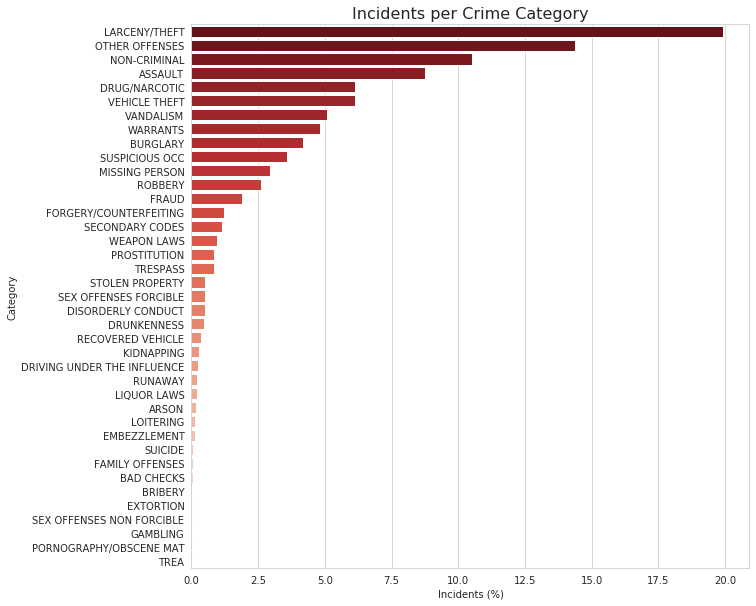

In [97]:
data = train_df.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
plt.figure(figsize=(10, 10))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="Reds_r")

plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

What about Dates and Weekday??

Let's first check the format used for the days of week and see how many crimes do we have for each of them.

In [98]:
train_df.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

Not so much to say here: the full names of the days are used and it seems that there are no material differences in term of number of crime for each day.

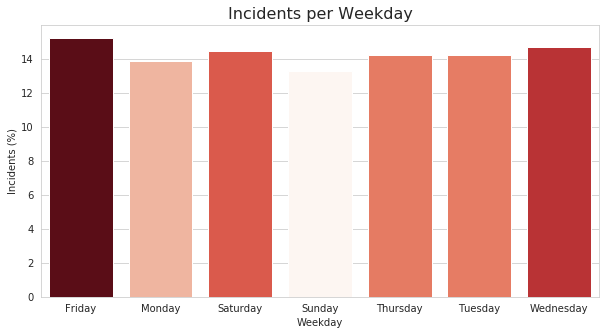

In [101]:
from matplotlib import cm
data = train_df.groupby('DayOfWeek').count().iloc[:, 0]
plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

plt.show()

Let's check the format used for the Dates..

In [18]:
train_df.Dates

0         2015-05-13 23:53:00
1         2015-05-13 23:53:00
2         2015-05-13 23:33:00
3         2015-05-13 23:30:00
4         2015-05-13 23:30:00
                 ...         
878044    2003-01-06 00:15:00
878045    2003-01-06 00:01:00
878046    2003-01-06 00:01:00
878047    2003-01-06 00:01:00
878048    2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: object

we can consider separating the hours from the dates in the next step..

## Feature Engineering

In [110]:
train_df['Dates'] = pd.to_datetime(train_df.Dates)

In [111]:
train_df['Times'] = train_df['Dates'].dt.strftime('%H:%M')

In [113]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Times
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30


In [23]:
train_df['Date'] = train_df['Dates'].dt.date

In [24]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Times,Date
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13


In [25]:
test_df['Dates'] = pd.to_datetime(test_df.Dates)

In [26]:
test_df['Dates']

0        2015-05-10 23:59:00
1        2015-05-10 23:51:00
2        2015-05-10 23:50:00
3        2015-05-10 23:45:00
4        2015-05-10 23:45:00
                 ...        
884257   2003-01-01 00:01:00
884258   2003-01-01 00:01:00
884259   2003-01-01 00:01:00
884260   2003-01-01 00:01:00
884261   2003-01-01 00:01:00
Name: Dates, Length: 884262, dtype: datetime64[ns]

In [27]:
test_df['Times'] = test_df['Dates'].dt.strftime('%H:%M')
test_df['Date'] = test_df['Dates'].dt.date

In [28]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Times,Date
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23:59,2015-05-10
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23:51,2015-05-10
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23:50,2015-05-10
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10


In [29]:
train_df = train_df.drop(['Dates'], axis = 1)

In [30]:
test_df = test_df.drop(['Dates'], axis = 1)

In [31]:
combine = [train_df, test_df]

In [32]:
train_df.DayOfWeek

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
878044       Monday
878045       Monday
878046       Monday
878047       Monday
878048       Monday
Name: DayOfWeek, Length: 878049, dtype: object

In [33]:
DayOfWeek_mapping = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
for dataset in combine:
    dataset['Day_of_Week'] = dataset['DayOfWeek'].map(DayOfWeek_mapping)

In [34]:
train_df = train_df.drop(['DayOfWeek'], axis=1)

In [35]:
test_df = test_df.drop(['DayOfWeek'], axis=1)

In [36]:
combine = [train_df, test_df]

In [37]:
District_mapping = {'SOUTHERN':1, 'MISSION':2, 'NORTHERN':3, 'BAYVIEW':4, 'CENTRAL':5, 'TENDERLOIN':6, 'INGLESIDE':7, 'TARAVAL':8, 'PARK':9, 'RICHMOND':10}
for dataset in combine:
    dataset['Pd_District'] = dataset['PdDistrict'].map(District_mapping)

In [38]:
train_df.drop(['PdDistrict'], axis=1)

,Category,Descript,Resolution,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,WARRANTS,WARRANT ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9
...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,ROBBERY ON THE STREET WITH A GUN,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,00:15,2003-01-06,1,8
878045,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,600 Block of EDNA ST,-122.447364,37.731948,00:01,2003-01-06,1,7
878046,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,00:01,2003-01-06,1,1
878047,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,00:01,2003-01-06,1,1


In [39]:
test_df.drop(['PdDistrict'], axis=1)

,Id,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,0,2000 Block of THOMAS AV,-122.399588,37.735051,23:59,2015-05-10,7,4
1,1,3RD ST / REVERE AV,-122.391523,37.732432,23:51,2015-05-10,7,4
2,2,2000 Block of GOUGH ST,-122.426002,37.792212,23:50,2015-05-10,7,3
3,3,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10,7,7
4,4,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10,7,7
...,...,...,...,...,...,...,...,...
884257,884257,2600 Block of BRYANT ST,-122.408983,37.751987,00:01,2003-01-01,3,2
884258,884258,1900 Block of WASHINGTON ST,-122.425342,37.792681,00:01,2003-01-01,3,3
884259,884259,5500 Block of MISSION ST,-122.445418,37.712075,00:01,2003-01-01,3,7
884260,884260,1500 Block of HUDSON AV,-122.387394,37.739479,00:01,2003-01-01,3,4


In [40]:
combine = [train_df, test_df]

In [41]:
train_df.Resolution.value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [42]:
unique_categories = list(train_df['Category'].unique())
unique_categories

['WARRANTS',
 'OTHER OFFENSES',
 'LARCENY/THEFT',
 'VEHICLE THEFT',
 'VANDALISM',
 'NON-CRIMINAL',
 'ROBBERY',
 'ASSAULT',
 'WEAPON LAWS',
 'BURGLARY',
 'SUSPICIOUS OCC',
 'DRUNKENNESS',
 'FORGERY/COUNTERFEITING',
 'DRUG/NARCOTIC',
 'STOLEN PROPERTY',
 'SECONDARY CODES',
 'TRESPASS',
 'MISSING PERSON',
 'FRAUD',
 'KIDNAPPING',
 'RUNAWAY',
 'DRIVING UNDER THE INFLUENCE',
 'SEX OFFENSES FORCIBLE',
 'PROSTITUTION',
 'DISORDERLY CONDUCT',
 'ARSON',
 'FAMILY OFFENSES',
 'LIQUOR LAWS',
 'BRIBERY',
 'EMBEZZLEMENT',
 'SUICIDE',
 'LOITERING',
 'SEX OFFENSES NON FORCIBLE',
 'EXTORTION',
 'GAMBLING',
 'BAD CHECKS',
 'TREA',
 'RECOVERED VEHICLE',
 'PORNOGRAPHY/OBSCENE MAT']

In [43]:
my_categories = {}

categories_count = 0

for i_category in unique_categories:
    
    categories_count = categories_count + 1
    my_categories[i_category] = categories_count
    
my_categories

{'WARRANTS': 1,
 'OTHER OFFENSES': 2,
 'LARCENY/THEFT': 3,
 'VEHICLE THEFT': 4,
 'VANDALISM': 5,
 'NON-CRIMINAL': 6,
 'ROBBERY': 7,
 'ASSAULT': 8,
 'WEAPON LAWS': 9,
 'BURGLARY': 10,
 'SUSPICIOUS OCC': 11,
 'DRUNKENNESS': 12,
 'FORGERY/COUNTERFEITING': 13,
 'DRUG/NARCOTIC': 14,
 'STOLEN PROPERTY': 15,
 'SECONDARY CODES': 16,
 'TRESPASS': 17,
 'MISSING PERSON': 18,
 'FRAUD': 19,
 'KIDNAPPING': 20,
 'RUNAWAY': 21,
 'DRIVING UNDER THE INFLUENCE': 22,
 'SEX OFFENSES FORCIBLE': 23,
 'PROSTITUTION': 24,
 'DISORDERLY CONDUCT': 25,
 'ARSON': 26,
 'FAMILY OFFENSES': 27,
 'LIQUOR LAWS': 28,
 'BRIBERY': 29,
 'EMBEZZLEMENT': 30,
 'SUICIDE': 31,
 'LOITERING': 32,
 'SEX OFFENSES NON FORCIBLE': 33,
 'EXTORTION': 34,
 'GAMBLING': 35,
 'BAD CHECKS': 36,
 'TREA': 37,
 'RECOVERED VEHICLE': 38,
 'PORNOGRAPHY/OBSCENE MAT': 39}

In [44]:
train_df.head()

,Category,Descript,PdDistrict,Resolution,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9


In [45]:
train_df['Category'] = train_df['Category'].map(my_categories)

In [46]:
train_df.head()

,Category,Descript,PdDistrict,Resolution,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,1,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
1,2,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
2,2,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3
3,3,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3
4,3,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9


In [47]:
train_df.drop(['PdDistrict'], axis = 1)

,Category,Descript,Resolution,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,1,WARRANT ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
1,2,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
2,2,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3
3,3,GRAND THEFT FROM LOCKED AUTO,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3
4,3,GRAND THEFT FROM LOCKED AUTO,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9
...,...,...,...,...,...,...,...,...,...,...
878044,7,ROBBERY ON THE STREET WITH A GUN,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,00:15,2003-01-06,1,8
878045,3,GRAND THEFT FROM LOCKED AUTO,NONE,600 Block of EDNA ST,-122.447364,37.731948,00:01,2003-01-06,1,7
878046,3,GRAND THEFT FROM LOCKED AUTO,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,00:01,2003-01-06,1,1
878047,5,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,00:01,2003-01-06,1,1


In [48]:
train_df.drop(['Descript'], axis = 1, inplace=True)

In [49]:
train_df.drop(['PdDistrict'], axis = 1, inplace=True)

In [50]:
test_df.drop(['PdDistrict'], axis = 1, inplace=True)

In [51]:
train_df.drop(['Resolution'], axis = 1, inplace=True)

In [52]:
combine = [train_df, test_df]

In [53]:
train_df.head()


,Category,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,1,OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
1,2,OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
2,2,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3
3,3,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3
4,3,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9


In [54]:
for dataset in combine:
 dataset['Intersection']=dataset['Address'].apply(lambda x : 1 if '/' in x else 0)
 dataset['Block']=dataset['Address'].apply(lambda x : 1 if 'Block' in x else 0)
 dataset['StreetSuffix']=dataset['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 

In [55]:
train_df.head()

,Category,Address,X,Y,Times,Date,Day_of_Week,Pd_District,Intersection,Block,StreetSuffix
0,1,OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3,1,0,ST
1,2,OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3,1,0,ST
2,2,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3,1,0,ST
3,3,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3,0,1,ST
4,3,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9,0,1,ST


In [56]:
test_df.head()

,Id,Address,X,Y,Times,Date,Day_of_Week,Pd_District,Intersection,Block,StreetSuffix
0,0,2000 Block of THOMAS AV,-122.399588,37.735051,23:59,2015-05-10,7,4,0,1,AV
1,1,3RD ST / REVERE AV,-122.391523,37.732432,23:51,2015-05-10,7,4,1,0,AV
2,2,2000 Block of GOUGH ST,-122.426002,37.792212,23:50,2015-05-10,7,3,0,1,ST
3,3,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10,7,7,0,1,ST
4,4,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10,7,7,0,1,ST


In [57]:
train_df.StreetSuffix.unique()

array(['ST', 'AV', 'WY', 'BL', 'DR', 'CT', 'TR', 'HY', 'RD', 'PZ', 'PL',
       'LN', 0, 'AL', 'CR', 'WK', 'EX', 'RW'], dtype=object)